In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
N_df = pd.read_csv('gdrive/MyDrive/cpages.csv')

In [ ]:
# Standard Libraries
import pandas as pd
import numpy as np
import json

# Data Preprocessing & NLP
import nltk
import re
import string
import gensim
from textblob import Word

import xgboost as xgb
from xgboost import XGBClassifier

from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, BaggingRegressor, GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics.pairwise import linear_kernel

# Performance metrics
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set()
%matplotlib inline

import warnings

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
N_df.head()

,Top pages,Clicks,Impressions,CTR,Position
0,https://hbuk.co.uk/,295,2300,12.83%,11.47
1,https://hbuk.co.uk/write-for-us,106,880,12.05%,42.20
2,https://hbuk.co.uk/antonio-metastasio,104,937,11.10%,24.22
3,https://hbuk.co.uk/magway-appoints-former-iod-...,30,561,5.35%,9.70
4,https://hbuk.co.uk/dimensions-scotland-hiring,27,1741,1.55%,13.01


In [ ]:
df=N_df.drop(['Clicks', 'Impressions', 'CTR', 'Position'], axis=1)

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df

,Top pages
0,https://hbuk.co.uk/
1,https://hbuk.co.uk/write-for-us
2,https://hbuk.co.uk/antonio-metastasio
3,https://hbuk.co.uk/magway-appoints-former-iod-...
4,https://hbuk.co.uk/dimensions-scotland-hiring
...,...
995,https://hbuk.co.uk/future-of-food
996,https://hbuk.co.uk/fantasy-football-hub-attrac...
997,https://hbuk.co.uk/psg-led-series-b-funding-of...
998,https://hbuk.co.uk/killing-eve-billboard-campa...


In [ ]:
col = [ 'Top pages']
df = df[col]

In [ ]:
df.columns = ['Pages']


In [ ]:
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()
    return " ".join(text)

In [ ]:
df['Pages'] = df['Pages'].apply(tokens)
df.head()

,Pages
0,https hbuk co uk
1,https hbuk co uk write for us
2,https hbuk co uk antonio metastasio
3,https hbuk co uk magway appoints former iod ce...
4,https hbuk co uk dimensions scotland hiring


In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
import nltk
words = set(nltk.corpus.words.words())



In [ ]:
import re

pattern = re.compile("^(https hbuk co uk|The)\s+(.+)", flags=re.IGNORECASE)

def process(word):
    w = pattern.match(word)
    return w.group(2) if w else word

process('https hbuk co uk')  # 'Study in Scarlet'


'https hbuk co uk'

In [ ]:
df['Pages'] = df['Pages'].apply(process)
df.head()

,Pages
0,https hbuk co uk
1,write for us
2,antonio metastasio
3,magway appoints former iod ceo anna daroy as md
4,dimensions scotland hiring


In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline


In [ ]:
classifier = pipeline("zero-shot-classification",
                      model="valhalla/distilbart-mnli-12-3")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [ ]:
#classifier = pipeline("zero-shot-classification",
                      #model="facebook/bart-large-mnli")

# New Section

In [ ]:
#labels = ['commercial', 'education']

In [ ]:
#page_li=df['Pages'].iloc[50]

In [ ]:
#classifier(page)

In [ ]:
#label_list = []
#label_list_score = []

In [ ]:
#dfc = dfc[dfc['Top pages'].str.contains("/blog/")]


In [ ]:
#for index, row in dfc.iterrows():

  #string_to_classify = row[2] + ". " + row[3]
  #result = classifier(string_to_classify, labels)

In [ ]:
#convert the list of dictionary into pandas DataFrame
#new = pd.DataFrame(output)
#new.head()

In [ ]:
sequence_to_classify = df["Pages"]
candidate_labels = ['commercial', 'education']
classifier(sequence_to_classify, candidate_labels)
#{'labels': ['travel', 'dancing', 'cooking'],
# 'scores': [0.9938651323318481, 0.0032737774308770895, 0.002861034357920289],
# 'sequence': 'one day I will see the world'}

{'sequence': 'https hbuk co uk',
 'labels': ['commercial', 'education'],
 'scores': [0.5444916486740112, 0.4555083215236664]}

In [ ]:
df['category'] = df.apply(lambda row: "education" if ((classifier(row.Pages, candidate_labels)['labels'][0]=='education' and
                                                         (classifier(row.Pages, candidate_labels)['scores'][0])>
                                                         classifier(row.Pages, candidate_labels)['scores'][1])) else 'commercial'
                                                        , axis = 1)



In [ ]:
df.to_csv('MoneyPages.csv')


In [ ]:
df.head(30)

,Pages,category
0,https hbuk co uk,commercial
1,write for us,commercial
2,antonio metastasio,commercial
3,magway appoints former iod ceo anna daroy as md,education
4,dimensions scotland hiring,commercial
5,write for us,commercial
6,sanford royce,education
7,top in tech londons most valuable music startups,commercial
8,obiyo nwigwe,commercial
9,douglas tincello,commercial


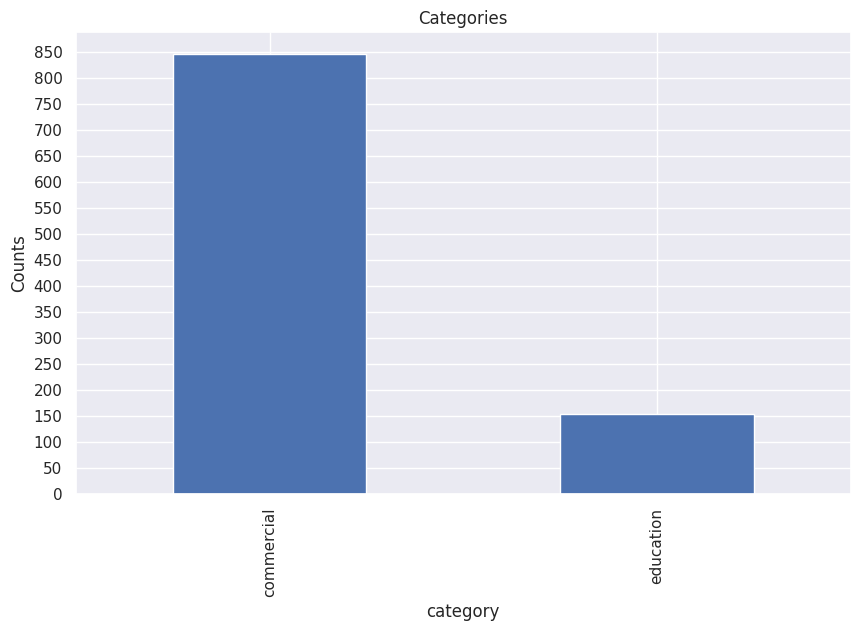

In [55]:
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

df["category"].value_counts().plot(kind='bar')
plt.xlabel("category")
plt.ylabel("Counts")
plt.title("Categories")
plt.yticks(range(0, df["category"].value_counts().max() + 50, 50))
plt.show()

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
education = df[df .category== 'education']
commercial = df[df .category== 'commercial']
commercial.head()


,Pages,category
0,https hbuk co uk,commercial
1,write for us,commercial
2,antonio metastasio,commercial
4,dimensions scotland hiring,commercial
5,write for us,commercial


In [37]:
education_words =[]

for review in education.Pages:
    education_words.append(review)
education_words = ' '.join(education_words)
education_words[:1000]

'magway appoints former iod ceo anna daroy as md sanford royce sanskrit puzzle jagermeister appoints campus for student ambassador scheme gener founder talks about privacy charitable actions and his startup journey what ive learnt aymeric monod gayraud ceo at zipzero investment for women total fitness walkden sees increase in new members author chaimaa rugbys damian hopley and christian day on changing the game category health jagermeister appoints campus for student ambassador scheme third of north west homeowners are unaware of this consumer protection law which could save them thousands esg impact angent md joins board of brave bison magway appoints former iod ceo anna daroy as md sky sports alex payne shares lessons learnt during his startups first year film hub north and fulwell are teaming up to find the next generation of northern talent molecular biology techniques angent md joins board of brave bison small business training programs author dan salford launches world first cour

In [38]:
commercial_words =[]

for review in commercial.Pages:
    commercial_words.append(review)
commercial_words = ' '.join(commercial_words)
commercial_words[:1000]

'https hbuk co uk write for us antonio metastasio dimensions scotland hiring write for us top in tech londons most valuable music startups obiyo nwigwe douglas tincello edinburgh airport delays top in tech londons most valuable music startups lonely planet launches new anti guidebook experience series how many billionaires are there in the world hambro perks appoints former equerry to the prince of wales as a new md haribo has launched its first ever mobile augmented reality experience for fans about haribo augmented reality eurostar hikes cost of carte blanche frequent traveller scheme by alessandro michele gucci human longevity shojin hires recently exited global marketing agency founder as cmo eurostar hikes cost of carte blanche frequent traveller scheme by dreams beds is successful with its digital marketing campaign due to ccw ronald perelman dietrich mateschitz red bull huel microsoft tesco among biggest uk facebook spenders category technology category technology softline appoi

# **Common Words in Education**

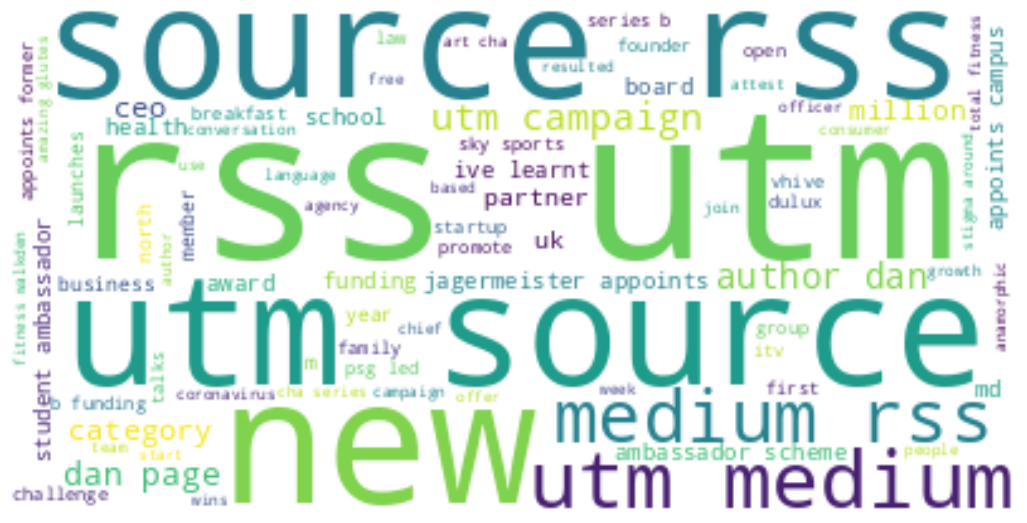

In [39]:
wordcloud = WordCloud(background_color="white", max_words=len(education_words))

wordcloud.generate(education_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# **Removing words that are common with both commercial and education based on how data was obtained in order to visualise words that pertain mainly to education.**

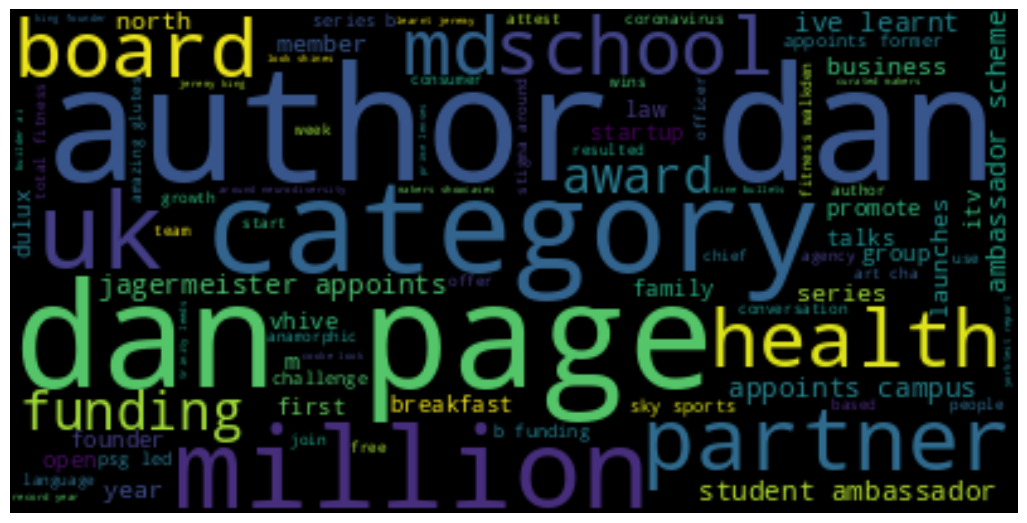

In [56]:
stopwords = set(STOPWORDS)
stopwords.update(["rss", "utm", "source", "medium",'new', 'ceo', 'campaign']) # Add more stopwords as needed

wordcloud = WordCloud(background_color="black", max_words=len(education_words), stopwords=stopwords)

wordcloud.generate(education_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### **Common Words in Commercial**

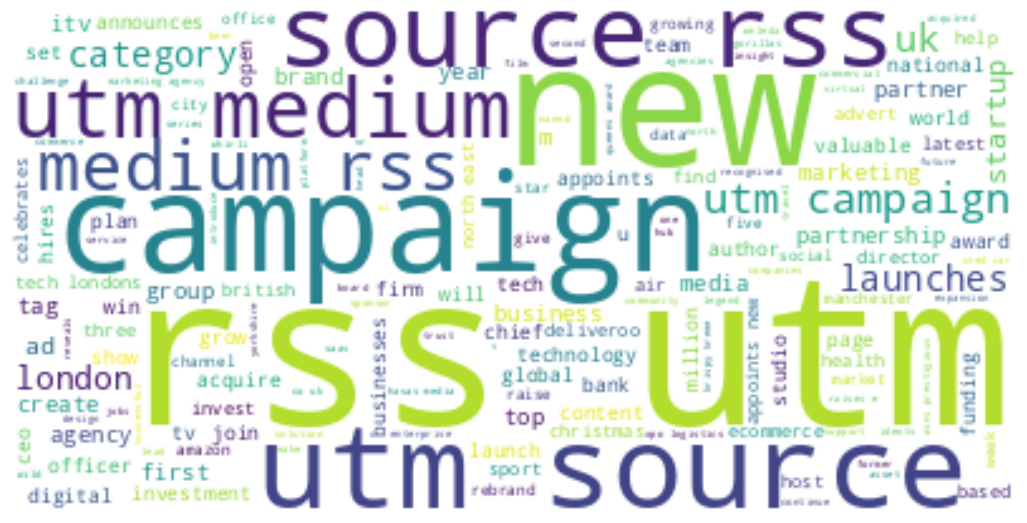

In [40]:
wordcloud = WordCloud(background_color="white", max_words=len(commercial_words))

wordcloud.generate(commercial_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# **Removing words that are common with both commercial and education based on how data was obtained in order to visualise words that pertain mainly to commercial.**

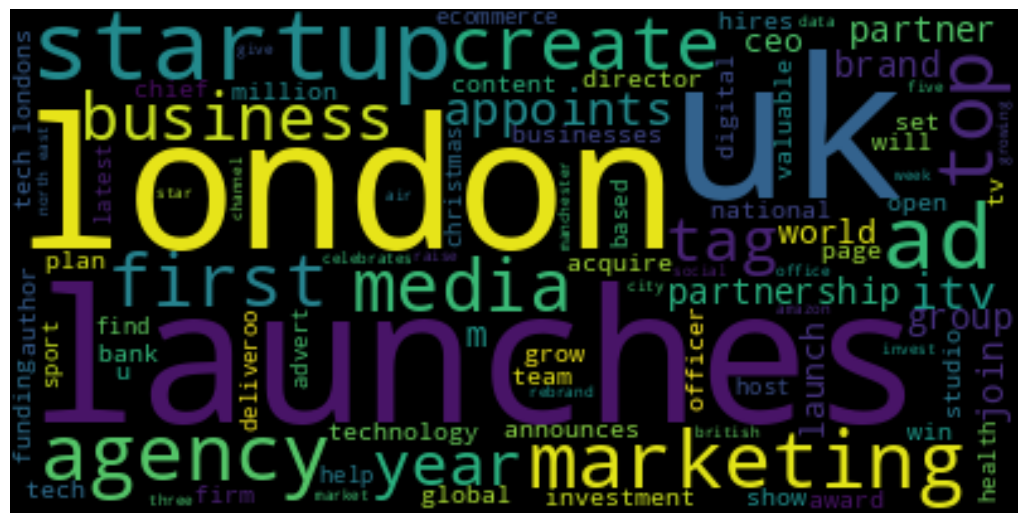

In [51]:
stopwords = set(STOPWORDS)
stopwords.update(["rss", "utm", "source", "medium",'new', 'campaign', 'category']) # Add more stopwords as needed

wordcloud = WordCloud(background_color="black", max_words=len(commercial_words), stopwords=stopwords)

wordcloud.generate(commercial_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [43]:
stopwords = ['rss', 'utm', 'source',  'medium']

#A function to generate the word cloud from text
def generate_basic_wordcloud(commercial_words, title):
    cloud = WordCloud(width=400,
                      height=330,
                      max_words=150,
                      colormap='tab20c',
                      stopwords=stopwords,
                      collocations=True).generate_from_text(commercial_words)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.show()

In [ ]:
df.to_csv('MoneyPages.csv')
